On importe le fichier contenant les consommations d’essence :


In [1]:
!wget -q https://github.com/opentrainingcamp/python/raw/main/Exemples/Data/essence.txt

In [2]:
import pandas as pd
essence=pd.read_csv("essence.txt")

In [ ]:
essence.info()

In [ ]:
essence.head()

In [5]:
essence.shape

(128, 1)

On calcule la moyenne, la variance et l’écart-type de l’échantillon :

In [6]:
import numpy as np
import math


In [7]:
xbar=np.mean(essence['conso'])
round(xbar,2)

31.45

In [10]:
# Ou encore directemetn en Pandas et en une seule expression
round(essence['conso'].mean(), 2)

31.45

In [11]:
sprime = np.std(essence['conso'], ddof=1)
round(sprime,2)

2.16

La loi normale parente est de moyenne µ et d'écart-type σ. Soit V(X) sa variance, $V(X)=σ^2$

• $(s)^2=\frac{\sum(x_i-m)^2}{(n-1)}$ est un estimateur sans biais de $V(X)=(σ)^2$     (ce qui signifie que l'espérance de $(s)^2$ est égale à $(σ)2^ : E((s)^2)=(σ)^2)$


Très souvent l'origine du n-1 reste un mystère ... pourquoi pas n qui correspondrait à l'effectif de l'échantillon ? La raison vous en est donnée si vous lisez la suite.

Origine du n-1 dans les variances expérimentales, un peu de maths, que je ne détail pas ici: on montre que Σ(xi-m)2/(n) est un estimateur biaisé de $(σ)2$  car l'espérance de $Σ(xi-m)^2/(n)$ n'est pas (σ)2 mais $(σ)^2*(n-1)/n$ 

In [12]:
n_essence = len(essence)
# variance non biaisé avec numpy
sprime2 = np.var(essence['conso'], ddof=1)
round(sprime2,2)

4.66

Le paramétre ddof 

« Delta degrés de liberté » : le diviseur utilisé dans le calcul est N - dddf, où N représente le nombre d'éléments. Par défaut ddof est égal à zéro.

In [14]:
# variance biasié
v = np.var(essence['conso'])
round(v,2)

4.63

Text(0.5, 1.0, 'histogramme')

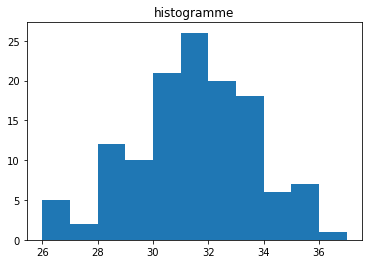

In [15]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")

On peut visualiser sur cet histogramme la moyenne empirique :



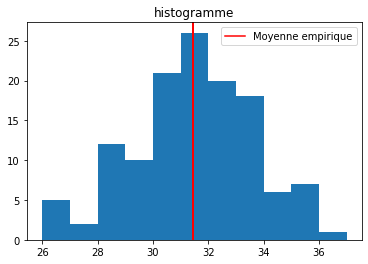

In [16]:
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])

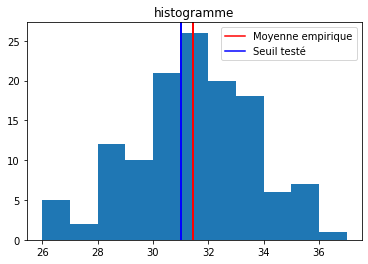

In [20]:
mu0=round(np.median(essence['conso'])) - 1
plt.hist(essence['conso'],bins=range(26,38))
plt.title("histogramme")
plt.axvline(xbar, color='r', linewidth=2)
plt.axvline(mu0, color='b', linewidth=2)
import matplotlib.lines as mlines
plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique"),mlines.Line2D([], [], color='blue',markersize=15, label=u"Seuil testé")])